Altair EDA Practice on Marketing Data

# Mount and Import

In [1]:
# mount drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# switch drives.
%cd /content/drive/MyDrive/market

/content/drive/MyDrive/market


In [3]:
# import libraries.
%matplotlib inline

import altair as alt
import matplotlib.pyplot as plt
import pandas as pd

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [4]:
# read csv and check the first five rows.
df = pd.read_csv('marketing_data.csv', sep=',')
df.head()

ID  Year_Birth   Education  ... Response Complain  Country
0   1826        1970  Graduation  ...        1        0       SP
1      1        1961  Graduation  ...        1        0       CA
2  10476        1958  Graduation  ...        0        0       US
3   1386        1967  Graduation  ...        0        0      AUS
4   5371        1989  Graduation  ...        1        0       SP

[5 rows x 28 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

# Preprocess

In [6]:
# clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

In [7]:
# transform Income column to a numerical
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [8]:
# check null values
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

In [9]:
# Impute null values in income through median.
df['Income'] = df['Income'].fillna(df['Income'].median())

In [10]:
# Income after imputation.
source = df

# The density transform performs one-dimensional kernel density estimation over 
# input data and generates a new column of samples of the estimated densities.
alt.Chart(source).transform_density(
    'Income',
    as_=['Income', 'density'],
).mark_area().encode(
    x="Income:Q",
    y='density:Q',
)

alt.Chart(...)

In [11]:
# Convert dt_customer column to datetime format.
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

Check distributions of columns

In [12]:
# we define each chart for each column.
recency = alt.Chart(source).mark_bar(
    color='lawngreen'
).encode(
    x =alt.X('Recency', bin=True, title="Recency"),
    y="count()"
).properties(
    width=200,
    height=200,
    title="Recency")

catalog = alt.Chart(source).mark_bar(
    color='yellow'
).encode(
    x =alt.X('NumCatalogPurchases', bin=True, title="NumCatalogPurchases"),
    y="count()"
).properties(
    width=200,
    height=200,
    title="Catalog purchases")

web = alt.Chart(source).mark_bar(
    color='green'
).encode(
    x =alt.X('NumWebVisitsMonth', bin=True, title="NumWebVisitsMonth"),
    y="count()"
).properties(
    width=200,
    height=200,
    title="Web visits")

deals = alt.Chart(source).mark_bar(
    color='cyan'
).encode(
    x =alt.X('NumDealsPurchases', bin=True, title="NumDealsPurchases"),
    y="count()"
).properties(
    width=200,
    height=200,
    title="Deal purchases")

store = alt.Chart(source).mark_bar(
    color='blue'
).encode(
    x =alt.X('NumStorePurchases', bin=True, title="NumStorePurchases"),
    y="count()"
).properties(
    width=200,
    height=200,
    title="Store purchases")

wines = alt.Chart(source).mark_bar(
    color='purple'
).encode(
    x =alt.X('MntWines', bin=True, title="MntWines"),
    y="count()"
).properties(
    width=200,
    height=200,
    title="Amount spent on Wines")

gold = alt.Chart(source).mark_bar(
    color='gold'
).encode(
    x =alt.X('MntGoldProds', bin=True, title="MntGoldProds"),
    y="count()"
).properties(
    width=200,
    height=200,
    title="Amount spent on Gold")

meat = alt.Chart(source).mark_bar(
    color='red'
).encode(
    x =alt.X('MntMeatProducts', bin=True, title="MntMeatProducts"),
    y="count()"
).properties(
    width=200,
    height=200,
    title="Amount spent on Meat")

fish = alt.Chart(source).mark_bar(
    color='gray'
).encode(
    x =alt.X('MntFishProducts', bin=True, title="MntFishProducts"),
    y="count()"
).properties(
    width=200,
    height=200,
    title="Amount spent on Fish")

sweets = alt.Chart(source).mark_bar(
    color='pink'
).encode(
    x =alt.X('MntSweetProducts', bin=True, title="MntSweetProducts"),
    y="count()"
).properties(
    width=200,
    height=200,
    title="Amount spent on Sweets")

fruits = alt.Chart(source).mark_bar(
    color='orange'
).encode(
    x =alt.X('MntFruits', bin=True, title="MntFruits"),
    y="count()"
).properties(
    width=200,
    height=200,
    title="Amount spent on Fruits")

# recency | catalog | store | web | fruits | wines 

In [13]:
# concatenate them into our own version of df.hist()
alt.concat(
    recency, catalog, deals, store, web, 
    fish, fruits, gold, meat, sweets, wines,
    columns=4
)

alt.ConcatChart(...)

We are going to ignore some features here like ID, Dt_Customer. Other features like Education can be encoded while some features are binary in nature. Some features on the other hand, can be used for feature engineering.

# Feature Engineering

In [14]:
# Compute age from year of birth.
df['Age'] = 2022-df['Year_Birth']
# Total spending.
df['Spending'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
# Total purchases.
df['TotalPurchases'] = (df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumStorePurchases'] + df['NumCatalogPurchases'])
# Total number of campaigns accepted
df['TotalAccepted'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [15]:
# source = df[['Country', 'Age', 'Recency', 'Spending', 'TotalPurchases', 'TotalAccepted']] 
source = df[['Country', 'Age', 'Income', 'Recency', 'Spending', 'TotalPurchases', 'TotalAccepted', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', \
             'NumWebPurchases', 'NumCatalogPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]
source

Country  Age   Income  ...  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5
0         SP   52  84835.0  ...             0             0             0
1         CA   61  57091.0  ...             0             0             0
2         US   64  67267.0  ...             0             0             0
3        AUS   55  32474.0  ...             0             0             0
4         SP   33  21474.0  ...             1             0             0
...      ...  ...      ...  ...           ...           ...           ...
2235      US   46  66476.0  ...             0             0             0
2236      SP   45  31056.0  ...             0             0             0
2237      SP   46  46310.0  ...             0             0             0
2238     IND   44  65819.0  ...             0             0             0
2239      CA   53  94871.0  ...             0             1             1

[2240 rows x 21 columns]

In [16]:
# prepare data for correlation matrix.
corr_data = (source.corr().stack()
              .reset_index()
              .rename(columns={0: 'Correlation', 'level_0': 'Variable', 'level_1': 'Variable_2'})     # The stacking results in an index on the correlation values, we need the index as normal columns for Altair
           )
corr_data['Correlation_label'] = corr_data['Correlation'].map('{:.2f}'.format)  # Round to 2 decimal
corr_data.head()

Variable      Variable_2  Correlation Correlation_label
0      Age             Age     1.000000              1.00
1      Age          Income     0.160899              0.16
2      Age         Recency     0.019871              0.02
3      Age        Spending     0.111306              0.11
4      Age  TotalPurchases     0.168304              0.17

In [17]:
# Build the heatmap.
base = alt.Chart(corr_data).encode(
    x='Variable_2:O',
    y='Variable:O'    
)

# Text layer with correlation labels
# Colors are for easier readability
text = base.mark_text().encode(
    text='Correlation_label',
    color=alt.condition(
        alt.datum.correlation > 0.5, 
        alt.value('white'),
        alt.value('black')
    )
)

# The correlation heatmap itself
corr_plot = base.mark_rect().encode(
    color='Correlation:Q'
)

# Set the height, width, title and other properties
corrMatrix_chart = (corr_plot + text).properties(
    width = 400,
    height = 400,
    title = "Marketing Correlation Matrix",
)
corrMatrix_chart.configure_axis(
    labelFontSize=14,
    titleFontSize=18,
).configure_title(
    fontSize=20,
    align='right',
    # anchor='start',
).configure_legend(
    labelFontSize=14,
    titleFontSize=18)

alt.LayerChart(...)

When we add spending, total accepted and total purchases, we can see that spending is related to purchases of most products (specifically meat and wine) but not on the number of deals purchases. Consumers are spending off the web and catalog.

# Questions that need answering...

1) What factors are significantly related to the number of total purchases? \
2) Is there a significant relationship between geographical regions and success of a campaign?


Question 1 Factors related to the number of total purchases.

In [18]:
df.corrwith(df.TotalPurchases).sort_values()

Kidhome               -0.477895
NumWebVisitsMonth     -0.312288
Year_Birth            -0.168304
ID                    -0.023834
Complain              -0.020583
Recency                0.005740
AcceptedCmp3           0.020709
AcceptedCmp2           0.076980
Teenhome               0.133163
Response               0.155138
Age                    0.168304
AcceptedCmp4           0.189331
AcceptedCmp5           0.217754
AcceptedCmp1           0.220041
TotalAccepted          0.257273
NumDealsPurchases      0.362334
MntFruits              0.455461
MntFishProducts        0.469454
MntSweetProducts       0.472876
MntGoldProds           0.493314
MntMeatProducts        0.554229
Income                 0.563450
MntWines               0.712789
NumCatalogPurchases    0.735198
Spending               0.753903
NumWebPurchases        0.777831
NumStorePurchases      0.820259
TotalPurchases         1.000000
dtype: float64

Purchase, spending, income and products all seem to be related.

Question 2 In terms of relationship between region and campaign. 

In [19]:
spending = alt.Chart(df).mark_bar().encode(
    x=alt.X('sum(Spending)'),
    y=alt.Y('Country',
               sort = '-x'),
    color= alt.condition(
        alt.datum.Country == "SP", 
        alt.value("darkred"),
        alt.value("lightgrey"))
        
).properties(
    width=400,
    height=200,
    title="Spending by Country")

totalpurchases = alt.Chart(df).mark_bar().encode(
    x=alt.X('sum(TotalPurchases)'),
    y=alt.Y('Country',
               sort = '-x'),
    color= alt.condition(
        alt.datum.Country == "SP", 
        alt.value("darkblue"),
        alt.value("lightgrey"))
).properties(
    width=400,
    # can use "container" to make it responsive.
    height=200,
    title="Purchases by Country")

totalaccepted = alt.Chart(df).mark_bar().encode(
    x=alt.X('sum(TotalAccepted)'),
    y=alt.Y('Country',
               sort = '-x'),
    color= alt.condition(
        alt.datum.Country == "SP", 
        alt.value("darkgreen"),
        alt.value("lightgrey"))
).properties(
    width=400,
    # can use "container" to make it responsive.
    height=200,
    title="Accepted by Country")

tp_text = totalpurchases.mark_text(
    align='left',
    baseline='middle',
    dx=3,  # Nudges text right
    color="darkblue"
).encode(
    text='sum(TotalPurchases)',
    opacity= alt.condition(
        alt.datum.Country == "SP", 
        alt.value(1.0),
        alt.value(0.0))
)

sp_text = spending.mark_text(
    align='left',
    baseline='middle',
    dx=3,  # Nudges text right
    color="darkred"
).encode(
    text='sum(Spending)',
    opacity= alt.condition(
        alt.datum.Country == "SP", 
        alt.value(1.0),
        alt.value(0.0))
)

ta_text = totalaccepted.mark_text(
    align='left',
    baseline='middle',
    dx=3,  # Nudges text right
    color="darkgreen"
).encode(
    text='sum(TotalAccepted)',
    opacity= alt.condition(
        alt.datum.Country == "SP", 
        alt.value(1.0),
        alt.value(0.0))
)

alt.concat(
    totalpurchases + tp_text, spending + sp_text, totalaccepted + ta_text,
    columns=3
)


alt.ConcatChart(...)

Seems like Spain is the country that spends the most.

In [20]:
cmp1 = alt.Chart(df).mark_bar(color = "lightgrey").encode(
    y=alt.Y('sum(AcceptedCmp1)'),
    x=alt.X('Country', sort = '-y')
).properties(
    width=200,
    height=200,
    title="Campaign 1 by Country")

cmp2 = alt.Chart(df).mark_bar(color = "lightgrey").encode(
    y='sum(AcceptedCmp2)',
    x=alt.X('Country', sort = '-y')
).properties(
    width=200,
    height=200,
    title="Campaign 2 by Country")

cmp3 = alt.Chart(df).mark_bar(color = "lightgrey").encode(
    y='sum(AcceptedCmp3)',
    x=alt.X('Country', sort = '-y')
).properties(
    width=200,
    height=200,
    title="Campaign 3 by Country")

cmp4 = alt.Chart(df).mark_bar(color = "lightgrey").encode(
    y='sum(AcceptedCmp4)',
    x=alt.X('Country', sort = '-y')
).properties(
    width=200,
    height=200,
    title="Campaign 4 by Country")

cmp5 = alt.Chart(df).mark_bar(color = "lightgrey").encode(
    y='sum(AcceptedCmp5)',
    x=alt.X('Country', sort = '-y')
).properties(
    width=200,
    height=200,
    title="Campaign 5 by Country")

alt.concat(
    cmp1, cmp2, cmp3, cmp4, cmp5,
    columns=5
)

alt.ConcatChart(...)

Most campaigns seem to be from Spain.

# Campaign Exploration

In [21]:
# accepted in %
sum_1 = sum(df['AcceptedCmp1'])
sum_2 = sum(df['AcceptedCmp2'])
sum_3 = sum(df['AcceptedCmp3'])
sum_4 = sum(df['AcceptedCmp4'])
sum_5 = sum(df['AcceptedCmp5'])
sum_r = sum(df['Response'])
print(sum_1, sum_2, sum_3, sum_4, sum_5, sum_r)

144 30 163 167 163 334


In [22]:
sum_accepted = pd.DataFrame({'Campaigns': ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'],
                           'Accepted': [sum_1, sum_2, sum_3, sum_4, sum_5]})

alt.Chart(sum_accepted).transform_joinaggregate(
    TotalAccepted = 'sum(Accepted)',
).transform_calculate(
    PercentOfTotal="datum.Accepted / datum.TotalAccepted"
).mark_bar().encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y=alt.Y('Campaigns:N', sort = '-x')
).properties(
    width=400,
    height=200,
    title="Accepted in Percentage among all Accepted")

alt.Chart(...)

Campaign 4 as the most accepted campaign in terms of percentage compared to other campaigns.

In [23]:
sum_accepted

Campaigns  Accepted
0  AcceptedCmp1       144
1  AcceptedCmp2        30
2  AcceptedCmp3       163
3  AcceptedCmp4       167
4  AcceptedCmp5       163

# Engagement Rate

In [24]:
df['Engaged1'] = df['AcceptedCmp1'].apply(lambda x: 0 if x == 0 else 1)
engagement_rate_df_1 = pd.DataFrame(
    df.groupby('Engaged1').count()['AcceptedCmp1'] / df.shape[0] * 100.0
)

df['Engaged2'] = df['AcceptedCmp2'].apply(lambda x: 0 if x == 0 else 1)
engagement_rate_df_2 = pd.DataFrame(
    df.groupby('Engaged2').count()['AcceptedCmp2'] / df.shape[0] * 100.0
)

df['Engaged3'] = df['AcceptedCmp3'].apply(lambda x: 0 if x == 0 else 1)
engagement_rate_df_3 = pd.DataFrame(
    df.groupby('Engaged3').count()['AcceptedCmp3'] / df.shape[0] * 100.0
)

df['Engaged4'] = df['AcceptedCmp4'].apply(lambda x: 0 if x == 0 else 1)
engagement_rate_df_4 = pd.DataFrame(
    df.groupby('Engaged4').count()['AcceptedCmp4'] / df.shape[0] * 100.0
)

df['Engaged5'] = df['AcceptedCmp5'].apply(lambda x: 0 if x == 0 else 1)
engagement_rate_df_5 = pd.DataFrame(
    df.groupby('Engaged5').count()['AcceptedCmp5'] / df.shape[0] * 100.0
)

In [25]:
engagement_by_offer_type_df_1 = pd.pivot_table(
    df, values='AcceptedCmp1', index='Country', columns='Engaged1', aggfunc=len
).fillna(0.0)

engagement_by_offer_type_df_1.columns = ['Not Engaged', 'Engaged']

engagement_by_offer_type_df_2 = pd.pivot_table(
    df, values='AcceptedCmp2', index='Country', columns='Engaged2', aggfunc=len
).fillna(0.0)

engagement_by_offer_type_df_2.columns = ['Not Engaged', 'Engaged']

engagement_by_offer_type_df_3 = pd.pivot_table(
    df, values='AcceptedCmp3', index='Country', columns='Engaged3', aggfunc=len
).fillna(0.0)

engagement_by_offer_type_df_3.columns = ['Not Engaged', 'Engaged']

engagement_by_offer_type_df_4 = pd.pivot_table(
    df, values='AcceptedCmp4', index='Country', columns='Engaged4', aggfunc=len
).fillna(0.0)

engagement_by_offer_type_df_4.columns = ['Not Engaged', 'Engaged']

engagement_by_offer_type_df_5 = pd.pivot_table(
    df, values='AcceptedCmp5', index='Country', columns='Engaged5', aggfunc=len
).fillna(0.0)

engagement_by_offer_type_df_5.columns = ['Not Engaged', 'Engaged']

In [26]:
engagement_by_offer_type_df_5

Not Engaged  Engaged
Country                      
AUS            147.0     13.0
CA             247.0     21.0
GER            112.0      8.0
IND            142.0      6.0
ME               3.0      0.0
SA             316.0     21.0
SP            1006.0     89.0
US             104.0      5.0

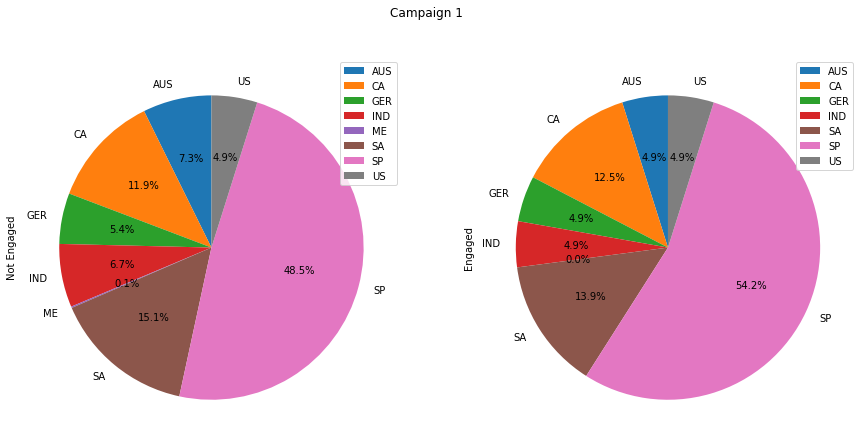

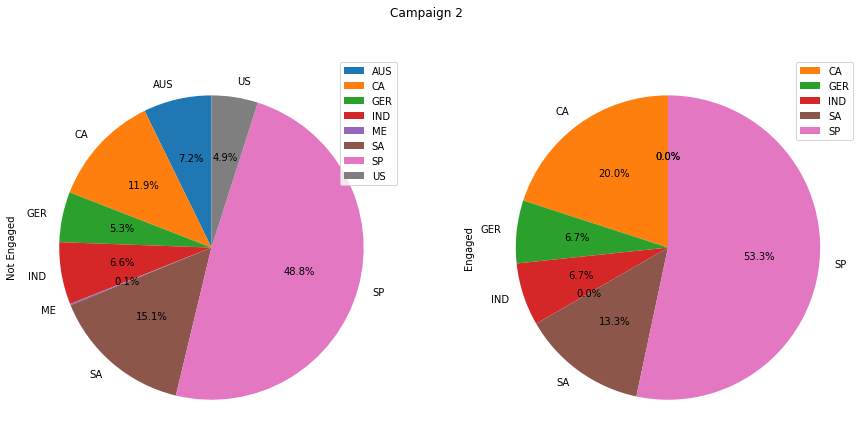

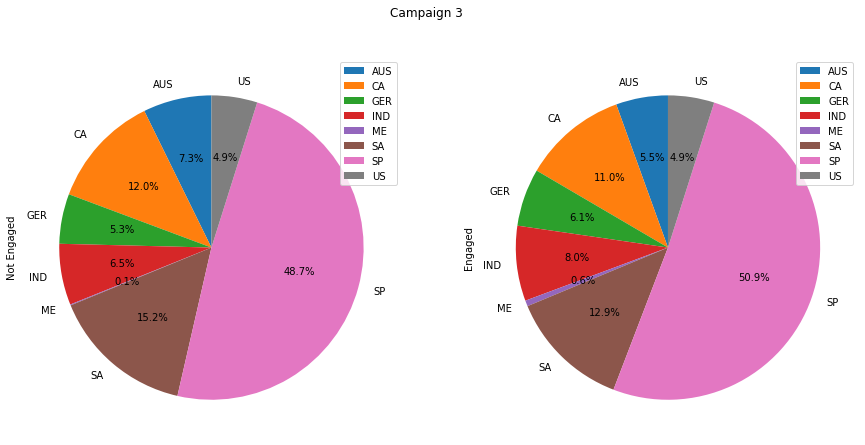

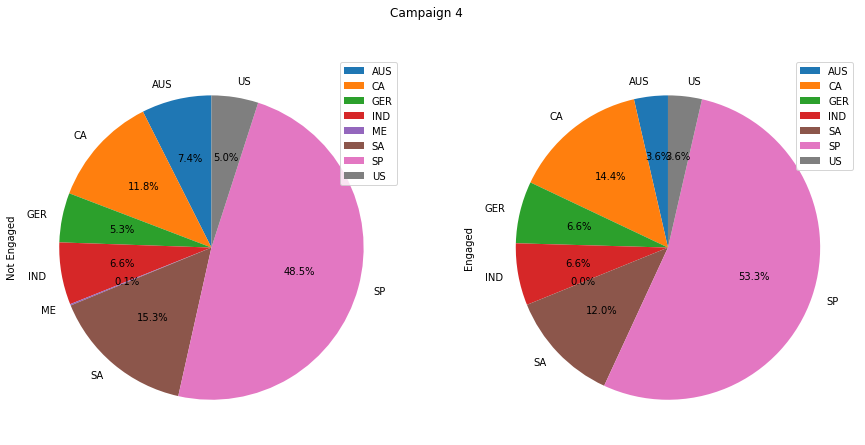

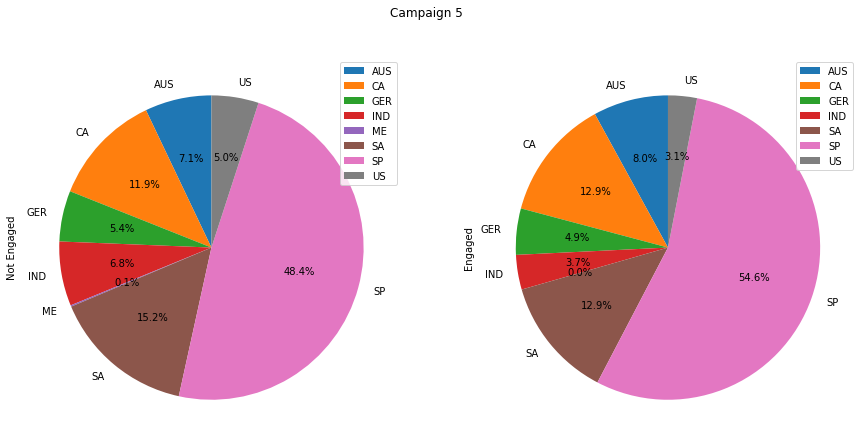

In [27]:
engagement_by_offer_type_df_1.plot(
    title='Campaign 1',
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

engagement_by_offer_type_df_2.plot(
    title='Campaign 2',
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

engagement_by_offer_type_df_3.plot(
    title='Campaign 3',
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

engagement_by_offer_type_df_4.plot(
    title='Campaign 4',
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

engagement_by_offer_type_df_5.plot(
    title='Campaign 5',
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

Judging by the graphs, with Spain there is consistency. They seem to be more engaged as opposed to not engaged across all campaigns.

# Regression Analysis

In [32]:
import statsmodels.api as sm

Test with continuous variables first

In [29]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age', 'Spending',
       'TotalPurchases', 'TotalAccepted', 'Engaged1', 'Engaged2', 'Engaged3',
       'Engaged4', 'Engaged5'],
      dtype='object')

In [35]:
continuous_vars = [
    'Recency', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumWebVisitsMonth', 'TotalPurchases', 'TotalAccepted', 'Spending'
]

In [37]:
# we test the highest engaged users in terms of percentage.
logit = sm.Logit(
    df['Engaged5'], 
    df[continuous_vars]
)

In [38]:
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.072205
         Iterations 10


In [39]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Engaged5   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2226
Method:                           MLE   Df Model:                           13
Date:                Mon, 14 Feb 2022   Pseudo R-squ.:                  0.7231
Time:                        21:24:42   Log-Likelihood:                -161.74
converged:                       True   LL-Null:                       -584.06
Covariance Type:            nonrobust   LLR p-value:                3.772e-172
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Recency                -0.0098      0.005     -1.889      0.059      -0.020       0.000
Income              -1.729e-05   8.98e-06     -1.925      0.054   -3.49e-05    3.16e-07
MntWines                0.0092      0.003      3.139      0.002       0.003       0.015
MntFruits               0.0057      0.005      1.104      0.270      -0.004       0.016
MntMeatProducts         0.0069      0.003      2.285      0.022       0.001       0.013
MntSweetProducts        0.0082      0.005      1.696      0.090      -0.001       0.018
MntGoldProds            0.0065      0.004      1.537      0.124      -0.002       0.015
NumDealsPurchases      -0.7063      0.250     -2.828      0.005      -1.196      -0.217
NumWebPurchases         0.0761      0.072      1.051      0.293      -0.066       0.218
NumCatalogPurchases     0.0059      0.096      0.062      0.951      -0.181       0.193
NumWebVisitsMonth      -0.7418      0.099     -7.524      0.000      -0.935      -0.549
TotalPurchases         -0.0638      0.056     -1.136      0.256      -0.174       0.046
TotalAccepted           2.9946      0.268     11.171      0.000       2.469       3.520
Spending               -0.0065      0.003     -2.257      0.024      -0.012      -0.001
=======================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/